Explore The Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Import the data

It has been preliminarily processed before

In [2]:
df = pd.read_csv('Lending Club Updated Version.csv')

In [3]:
# take a look the first 3 rows in the dataset 
df.head(3)

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,35000.0,60 months,13.58%,C,C2,Security Officer,7 years,MORTGAGE,160000.0,Source Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20000.0,36 months,5.31%,A,A1,Sr. Administrative Director,10+ years,MORTGAGE,339000.0,Source Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7000.0,36 months,11.98%,B,B5,Parole,< 1 year,MORTGAGE,40000.0,Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Understand the structure of the dataset  
df.shape

(107864, 85)

# Univariate Analysis

## Numerical Variables

### Subset the numerical features from dataset 

In [5]:
# Firstly, we should know that there are 88 features are numerical and 20 categorical features respectively.
df_type = pd.DataFrame(df.dtypes)
df_type.rename(columns={0:'data_type'},inplace=True)
df_type['data_type'].value_counts()

float64    65
object     20
Name: data_type, dtype: int64

In [6]:
# Subset the numerical columns
df_num = df.select_dtypes(include =['float64'])
df_num.shape

(107864, 65)

In [7]:
df_num.columns

Index(['loan_amnt', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'last_fico_range_high',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_il_tl',
       'num_tl_90

In [8]:
# Two kinds of data types in the dataset
df.dtypes.value_counts()

float64    65
object     20
dtype: int64

In [9]:
# list all the numerical variables 
num_variables = df.select_dtypes(include=['float64']).columns
num_variables

Index(['loan_amnt', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'last_fico_range_high',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_il_tl',
       'num_tl_90

In [10]:
num_variables = list(num_variables)
len(list(num_variables))

65

There are total 65 numerical variables in the dataset, so it would be appropriate to seperate them into 5 groups with 13 variables in each group. 

### The first group

loan_amnt
mean is:  16147.94
std is:  10184.02
min is:  1000.0
max is:  40000.0
1% quantile value is: 1600.0
10% quantile value is: 5000.0
90% quantile value is: 32000.0
99% quantile value is: 40000.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


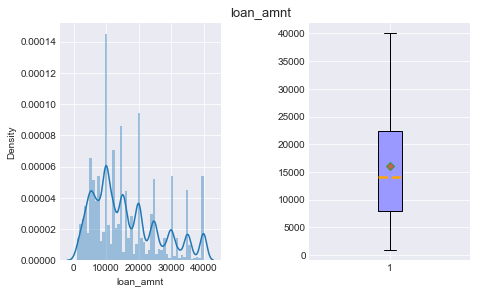

annual_inc
mean is:  78542.27
std is:  76874.36
min is:  0.0
max is:  8365188.0
1% quantile value is: 12607.560000000001
10% quantile value is: 32000.0
90% quantile value is: 135000.0
99% quantile value is: 283334.8499999958


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


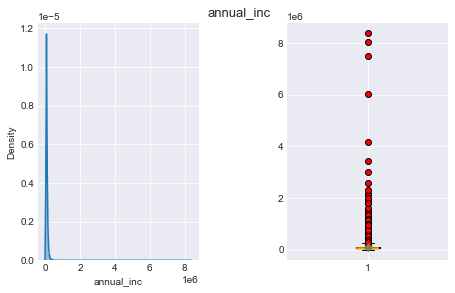

dti
mean is:  19.65
std is:  21.8
min is:  0.0
max is:  999.0
1% quantile value is: 1.0
10% quantile value is: 6.36
90% quantile value is: 32.32
99% quantile value is: 61.14970000000016


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


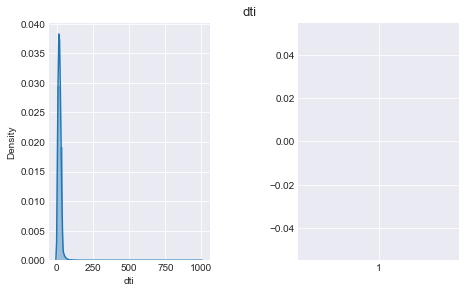

C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


delinq_2yrs
mean is:  0.22
std is:  0.73
min is:  0.0
max is:  20.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 1.0
99% quantile value is: 3.0


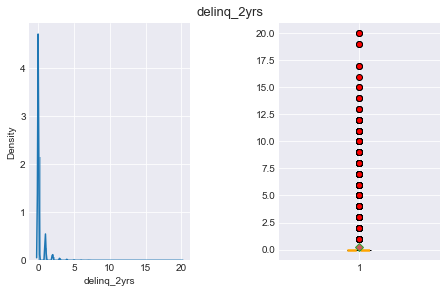

fico_range_low
mean is:  708.25
std is:  37.21
min is:  660.0
max is:  845.0
1% quantile value is: 660.0
10% quantile value is: 665.0
90% quantile value is: 760.0
99% quantile value is: 815.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


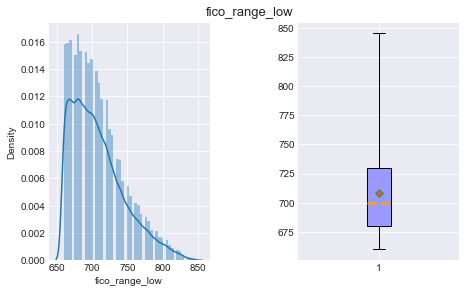

inq_last_6mths
mean is:  0.46
std is:  0.75
min is:  0.0
max is:  5.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 1.0
99% quantile value is: 3.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


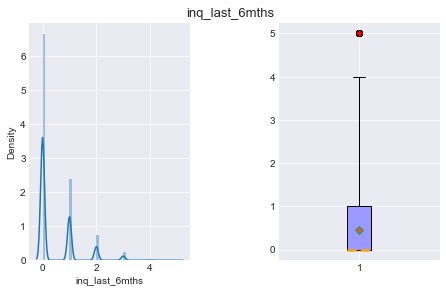

mths_since_last_delinq
mean is:  36.98
std is:  21.8
min is:  0.0
max is:  226.0
1% quantile value is: 3.0
10% quantile value is: 10.0
90% quantile value is: 69.0
99% quantile value is: 81.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


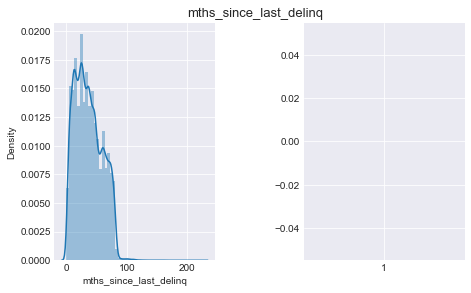

mths_since_last_record
mean is:  79.16
std is:  24.82
min is:  1.0
max is:  124.0
1% quantile value is: 10.0
10% quantile value is: 44.0
90% quantile value is: 108.0
99% quantile value is: 118.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


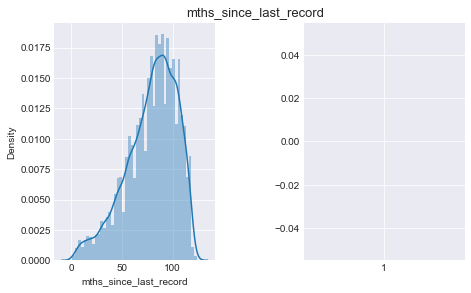

open_acc
mean is:  11.38
std is:  5.88
min is:  0.0
max is:  69.0
1% quantile value is: 2.0
10% quantile value is: 5.0
90% quantile value is: 19.0
99% quantile value is: 30.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


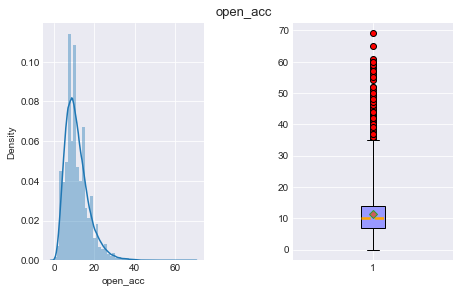

pub_rec
mean is:  0.16
std is:  0.49
min is:  0.0
max is:  52.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 1.0
99% quantile value is: 2.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


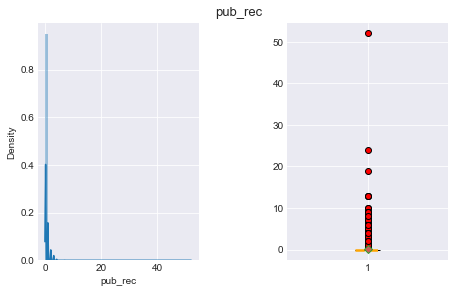

revol_bal
mean is:  16093.38
std is:  22176.26
min is:  0.0
max is:  925589.0
1% quantile value is: 0.0
10% quantile value is: 2055.0
90% quantile value is: 33423.0
99% quantile value is: 98626.31999999983


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


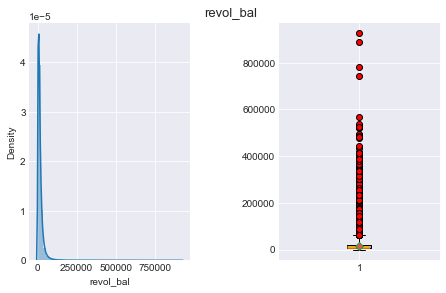

total_acc
mean is:  22.62
std is:  12.03
min is:  2.0
max is:  153.0
1% quantile value is: 4.0
10% quantile value is: 9.0
90% quantile value is: 39.0
99% quantile value is: 60.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


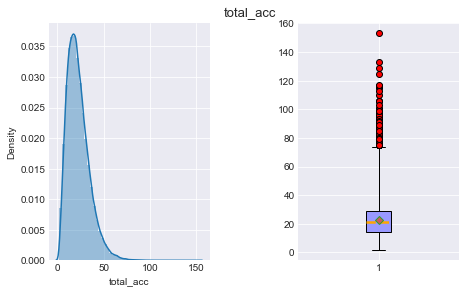

last_fico_range_high
mean is:  699.52
std is:  75.76
min is:  0.0
max is:  850.0
1% quantile value is: 499.0
10% quantile value is: 579.0
90% quantile value is: 789.0
99% quantile value is: 829.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


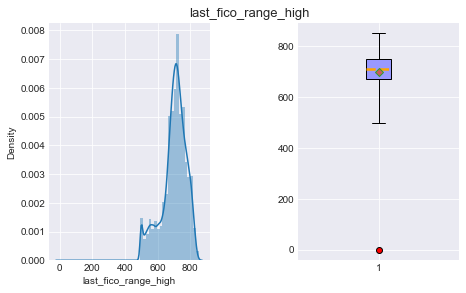

In [11]:
for col in num_variables[0:13]:
    print(col)
    print("mean is: ", round(df[col].mean(),2))
    print("std is: ", round(df[col].std(), 2))
    print("min is: ", df[col].min())
    print("max is: ", df[col].max())
    print("1% quantile value is:", df[col].quantile(.01))
    print("10% quantile value is:", df[col].quantile(.1))
    print("90% quantile value is:", df[col].quantile(.9))
    print("99% quantile value is:", df[col].quantile(.99))
    plt.style.use('seaborn-darkgrid')
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #ax = np.reshape(ax, (1, 2))
    fig.set_size_inches(6, 4)
    fig.subplots_adjust(wspace=.55, left=0.035, right=.985, top=.925, bottom=.1)
    fig.suptitle(col, fontsize=13)
    sns.distplot(df[col], label = "univariate analysis on: " + col, ax=ax1)
    #plt.savefig("figs/univariate_analysis/" + col + ".png")
    #plt.show()
    ax2.boxplot(x = df[col],
                whis = 3,# set extreme ourlier x > Q3+3(Q3-Q1) & X < Q1-3(Q3-Q1)
                patch_artist=True, 
                showmeans=True, # mean: show with point
                boxprops = {'color':'black','facecolor':'#9999ff'}, #set box features
                flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # outlier: show with o
                meanprops = {'marker':'D','markerfacecolor':'indianred'}, 
                medianprops = {'linestyle':'--', 'linewidth':2.5, 'color':'orange'}) # medium: show with line
    ax2.tick_params(top='off', right='off')
    #ax2.set_title("BoxPlot on: " + col)
    plt.show()

#### The variables that there are lots of outliers should be explored more

##### Annual_inc
From the above plot, it shows that there are many outliers existing in the annual_inc variable and the maximum even reach to over 8,000,000, which looks very abnormal. 

In [13]:
df_num['annual_inc'].describe()

count    1.078640e+05
mean     7.854227e+04
std      7.687436e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.500000e+04
max      8.365188e+06
Name: annual_inc, dtype: float64

Subset some high annual income people and want to figure out why they need to apply a loan. 
Most loans locating in this category do not need second applicant to help them to apply the loan. In addition, some of the loan_amount is really low, is it the concened? 

In [14]:
df_num[df_num['annual_inc']>6.365188e+05]

,loan_amnt,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,...,sec_app_fico_range_low,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
627,29600.0,1400000.00,7.80,1.0,685.0,3.0,20.0,NaN,26.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,40000.0,650000.00,6.21,0.0,740.0,0.0,67.0,NaN,7.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2510,28500.0,685000.00,9.75,0.0,710.0,1.0,63.0,NaN,17.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3800,39100.0,800000.00,3.13,0.0,835.0,0.0,NaN,NaN,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3866,20000.0,1200000.00,4.26,1.0,760.0,0.0,9.0,NaN,17.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98531,40000.0,2300000.00,3.08,0.0,670.0,0.0,35.0,6.0,9.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100891,35000.0,1784265.71,2.63,0.0,735.0,0.0,76.0,NaN,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104433,28000.0,1000000.00,10.63,0.0,730.0,0.0,72.0,NaN,12.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104946,35000.0,750000.00,9.63,1.0,685.0,0.0,15.0,15.0,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_num[df_num['annual_inc']>6.365188e+05]['loan_amnt'].describe()

count       94.000000
mean     25828.191489
std      12689.827563
min       1000.000000
25%      15000.000000
50%      28250.000000
75%      39875.000000
max      40000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

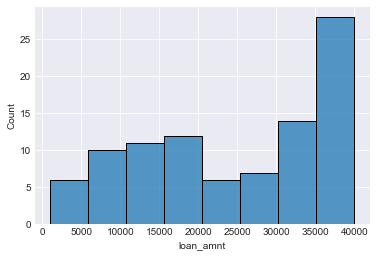

In [18]:
# Plot the histgram for those loan with extremely high annual income and it shows that 
# most of loans locate the between 3,5000 and 40,000
sns.histplot(df_num[df_num['annual_inc']>6.365188e+05]['loan_amnt'])

In [19]:
# From below result, it could be concluded that most of the loan with high incomm does not 
# require to provide second applicant to help them get the loan approved. 
df_num[df_num['annual_inc']>6.365188e+05]['sec_app_fico_range_low'].value_counts(dropna=False)

NaN      90
615.0     1
630.0     1
685.0     1
690.0     1
Name: sec_app_fico_range_low, dtype: int64

Future explore: compare the delinquncy rate between annual income in high group and in the mdedian group. 

##### Dti
Definition: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

The distribution plot and boxplot could not show the DTI clearly, so we want to explore it more

In [20]:
# The maximum debt-to-income ratio will vary by mortgage lender, loan program, and investor, 
# but the number generally ranges between 40-50%.From below result, the max is 999, 
# which is abnormal. 
df_num['dti'].describe()

count    107602.000000
mean         19.648209
std          21.795902
min           0.000000
25%          11.230000
50%          17.670000
75%          25.020000
max         999.000000
Name: dti, dtype: float64

<AxesSubplot:xlabel='dti', ylabel='Count'>

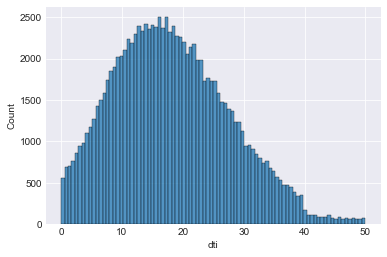

In [21]:
# plot the histgram with dti less than 50 and most of them mainly are on [10,30]
sns.histplot(df_num[df_num['dti']<50]['dti'])

In [22]:
df_num[df_num['dti']<50]['dti'].describe()

count    105735.000000
mean         18.226512
std           9.490400
min           0.000000
25%          11.110000
50%          17.450000
75%          24.560000
max          49.990000
Name: dti, dtype: float64

<AxesSubplot:xlabel='dti', ylabel='Count'>

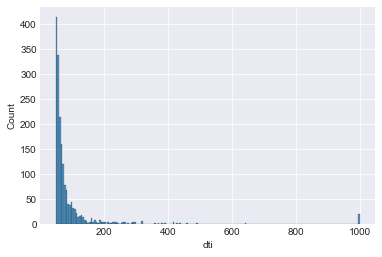

In [23]:
#For the loan with dti greater than 50,the range is very spread
sns.histplot(df_num[df_num['dti']>50]['dti'])

In [24]:
# Subset the loans with dit>= 50 and see if all of them require to have second applicant 
# to help them get loan approved. The answer is yes. 
df_num[df_num['dti']>=50]['sec_app_fico_range_low'].value_counts(dropna=False)

670.0    125
660.0    109
665.0    101
680.0     99
675.0     96
685.0     95
690.0     94
695.0     93
650.0     79
655.0     77
705.0     77
645.0     56
640.0     55
710.0     52
700.0     50
715.0     48
630.0     47
635.0     44
720.0     42
725.0     38
620.0     37
625.0     35
730.0     29
610.0     27
600.0     21
735.0     19
615.0     19
605.0     18
745.0     17
740.0     15
595.0     15
590.0     15
580.0     13
750.0      9
570.0      9
765.0      8
585.0      8
575.0      7
785.0      7
540.0      6
760.0      6
790.0      5
770.0      5
555.0      5
545.0      4
550.0      4
775.0      4
780.0      4
560.0      4
755.0      3
565.0      3
805.0      2
800.0      2
825.0      1
815.0      1
820.0      1
810.0      1
795.0      1
Name: sec_app_fico_range_low, dtype: int64

##### Delinq_2yrs
Definition: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [25]:
df_num['delinq_2yrs'].describe()

count    107864.000000
mean          0.223773
std           0.730417
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: delinq_2yrs, dtype: float64

<AxesSubplot:xlabel='delinq_2yrs', ylabel='Count'>

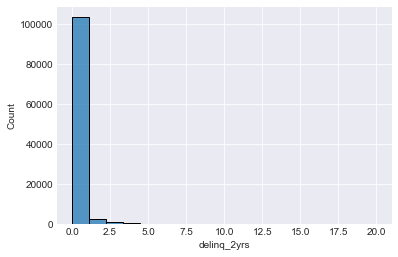

In [26]:
sns.histplot(df_num['delinq_2yrs'])

In [27]:
# From the below result, it shows most of the loans are zero or one time over due for past 2 years.
df_num['delinq_2yrs'].value_counts(dropna=False)

0.0     92407
1.0     10916
2.0      2727
3.0       902
4.0       419
5.0       193
6.0       108
7.0        54
8.0        41
10.0       32
9.0        26
11.0       15
12.0        9
14.0        3
13.0        3
20.0        2
17.0        2
19.0        2
15.0        2
16.0        1
Name: delinq_2yrs, dtype: int64

In [28]:
# Below is the percentage of how many time over due in the total loans for past 2 years 
df_num['delinq_2yrs'].value_counts(dropna=False,normalize=True)*100

0.0     85.669918
1.0     10.120151
2.0      2.528184
3.0      0.836238
4.0      0.388452
5.0      0.178929
6.0      0.100126
7.0      0.050063
8.0      0.038011
10.0     0.029667
9.0      0.024104
11.0     0.013906
12.0     0.008344
14.0     0.002781
13.0     0.002781
20.0     0.001854
17.0     0.001854
19.0     0.001854
15.0     0.001854
16.0     0.000927
Name: delinq_2yrs, dtype: float64

##### Pub_rec
Definition:Number of derogatory public records

A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts your ability to qualify for credit or other services. Public records and collections are derogatory items because they reflect financial obligations that were not paid as agreed.

The only type of public record information that would appear on your credit report is a bankruptcy filing., Bankruptcy information is collected and updated regularly from the courts. Filing for bankruptcy is considered derogatory because you are telling all your lenders that you will not be able to pay them in full, or at all.

In [29]:
df_num['pub_rec'].describe()

count    107864.000000
mean          0.163243
std           0.494799
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          52.000000
Name: pub_rec, dtype: float64

In [30]:
# The distribution of  'pub_rec' seems to have similar pattern with ' deling_2yrs', 
# so we cuold explore their relationship in the future to see if there is some pattern 
df_num['pub_rec'].value_counts(dropna=False)

0.0     92595
1.0     13922
2.0       866
3.0       265
4.0       115
5.0        51
6.0        20
7.0        11
8.0         6
9.0         5
13.0        3
10.0        2
52.0        1
19.0        1
24.0        1
Name: pub_rec, dtype: int64

In [31]:
df_num['pub_rec'].value_counts(dropna=False,normalize=True)

0.0     0.858442
1.0     0.129070
2.0     0.008029
3.0     0.002457
4.0     0.001066
5.0     0.000473
6.0     0.000185
7.0     0.000102
8.0     0.000056
9.0     0.000046
13.0    0.000028
10.0    0.000019
52.0    0.000009
19.0    0.000009
24.0    0.000009
Name: pub_rec, dtype: float64

#####  Revol_bal
Definition: Total credit revolving balance

In credit card terms, a revolving balance is the portion of credit card spending that goes unpaid at the end of a billing cycle. The amount can vary, going up or down depending on the amount borrowed and the amount repaid. If you revolve a balance — that is, not pay it off at the end of the month — the lender will charge you for the privilege of borrowing their money. The amount of the charge for revolving a balance will depend on the size of the balance and the interest rate of the card. When the balance is paid off, the customer is no longer revolving the debt.

In [32]:
# there are some severe outliers in this variable
df_num['revol_bal'].describe()

count    107864.000000
mean      16093.382880
std       22176.260283
min           0.000000
25%        5170.000000
50%       10657.000000
75%       19511.250000
max      925589.000000
Name: revol_bal, dtype: float64

<AxesSubplot:xlabel='revol_bal', ylabel='Count'>

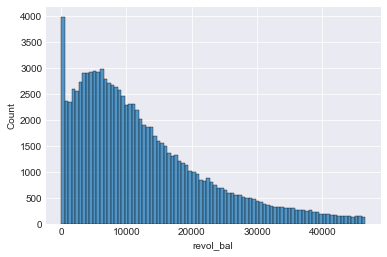

In [33]:
# plot the histgram of 'revol_bal' less than 0.95 pencentile. There are 
sns.histplot(df_num[df_num['revol_bal']< df_num['revol_bal'].quantile(0.95)]['revol_bal'])

In [35]:
df_num[df_num['revol_bal']<100]['revol_bal'].value_counts()

0.0     1254
8.0       22
5.0       20
10.0      18
4.0       18
        ... 
79.0       1
93.0       1
80.0       1
68.0       1
47.0       1
Name: revol_bal, Length: 100, dtype: int64

##### inq_last_6mths

Definition:The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

Background information: 
When you apply for credit, you authorize those lenders to ask or "inquire" for a copy of your credit report from a credit bureau. When you later check your credit report, you may notice that their credit inquiries are listed. The only inquiries that count toward your FICO Scores are the ones that result from your applications for new credit.

It's important to know that there are 2 types of credit inquiries. Soft inquiries such as viewing your own credit report will not affect your FICO Score. Hard inquiries such as actively applying for a new credit card or mortgage will affect your score. Read below to see how much hard inquiries can affect your FICO Score.

In [37]:
# From the below result, the variable of inq_last_6mths should be categorical 
df_num['inq_last_6mths'].value_counts(dropna=False)

0.0    71630
1.0    25578
2.0     7996
3.0     2492
4.0      132
5.0       36
Name: inq_last_6mths, dtype: int64

<AxesSubplot:xlabel='inq_last_6mths', ylabel='Count'>

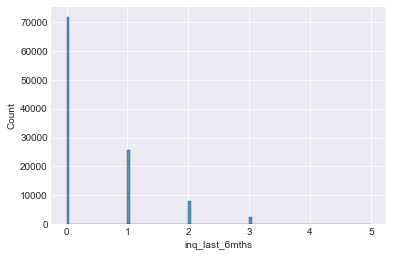

In [38]:
sns.histplot(df_num['inq_last_6mths'])

##### open_acc

Definition: The number of open credit lines in the borrower's credit file.

A trade line is basically a credit card, installment loan or other credit liability that is reported to the credit bureaus and displayed on a credit report.

Credit Trade Line / Approval Bullets:
- Banks usually won’t count a trade line that is less than 12 months old.
- The minimum number of trade lines most lenders find acceptable is 4 open and active trade lines.
- Lenders like to see at least one credit line of $5,000, or all credit lines to total $1,000 or more.

In [42]:
df_num['open_acc'].value_counts(dropna=False)

9.0     8962
8.0     8577
10.0    8398
7.0     8382
11.0    7748
        ... 
61.0       1
54.0       1
58.0       1
56.0       1
51.0       1
Name: open_acc, Length: 63, dtype: int64

<AxesSubplot:xlabel='open_acc', ylabel='Count'>

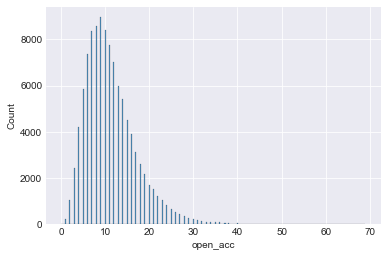

In [43]:
#from the histgram, the distribution of open_acc looks like normal, but right skew. 
sns.histplot(df_num['open_acc'])

### The second group

collections_12_mths_ex_med
mean is:  0.02
std is:  0.14
min is:  0.0
max is:  8.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 0.0
99% quantile value is: 1.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


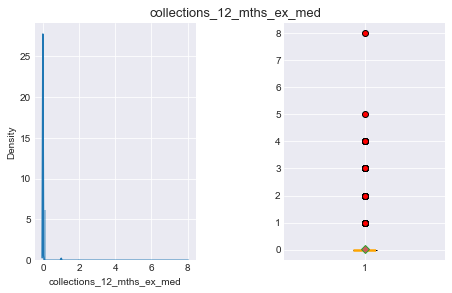

mths_since_last_major_derog
mean is:  46.19
std is:  21.56
min is:  0.0
max is:  226.0
1% quantile value is: 5.0
10% quantile value is: 16.0
90% quantile value is: 74.0
99% quantile value is: 94.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


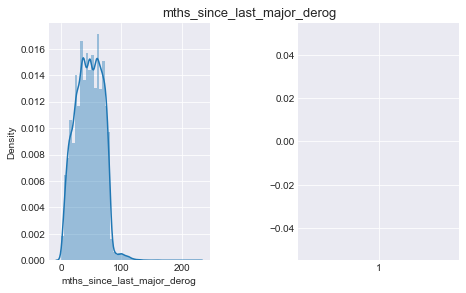

C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


annual_inc_joint
mean is:  125506.63
std is:  66816.65
min is:  18000.0
max is:  1187000.0
1% quantile value is: 36000.0
10% quantile value is: 64600.0
90% quantile value is: 197140.0
99% quantile value is: 360000.0


C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


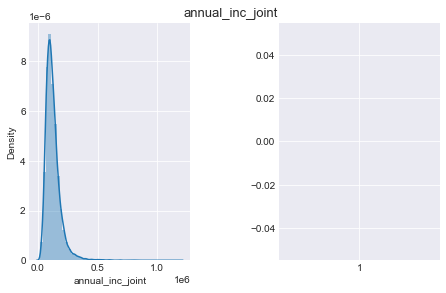

dti_joint
mean is:  19.66
std is:  8.04
min is:  0.0
max is:  39.98
1% quantile value is: 3.3850000000000007
10% quantile value is: 9.35
90% quantile value is: 30.61
99% quantile value is: 38.12700000000001


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


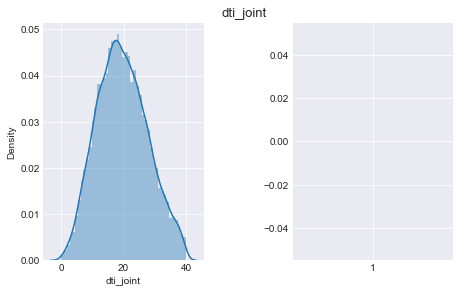

acc_now_delinq
mean is:  0.0
std is:  0.02
min is:  0.0
max is:  1.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 0.0
99% quantile value is: 0.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


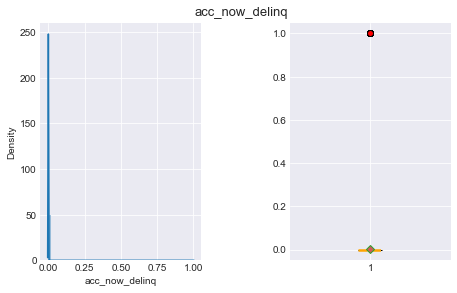

tot_coll_amt
mean is:  293.28
std is:  24813.19
min is:  0.0
max is:  6214661.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 174.0
99% quantile value is: 4128.849999999977


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


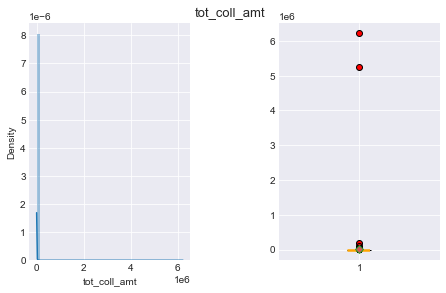

tot_cur_bal
mean is:  143763.18
std is:  167613.33
min is:  0.0
max is:  5752177.0
1% quantile value is: 1144.2600000000002
10% quantile value is: 11395.0
90% quantile value is: 359737.19999999995
99% quantile value is: 707740.8699999993


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


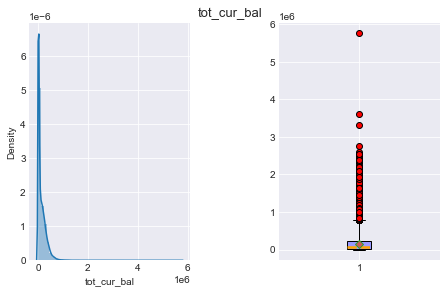

open_acc_6m
mean is:  0.9
std is:  1.12
min is:  0.0
max is:  12.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 2.0
99% quantile value is: 5.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


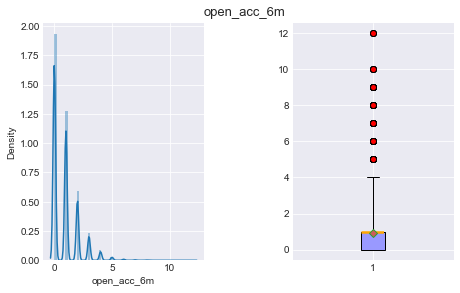

open_act_il
mean is:  2.66
std is:  2.93
min is:  0.0
max is:  41.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 6.0
99% quantile value is: 15.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


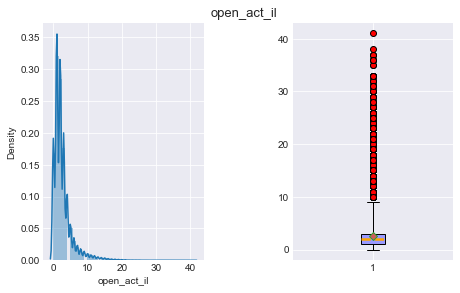

open_il_12m
mean is:  0.65
std is:  0.91
min is:  0.0
max is:  8.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 2.0
99% quantile value is: 4.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


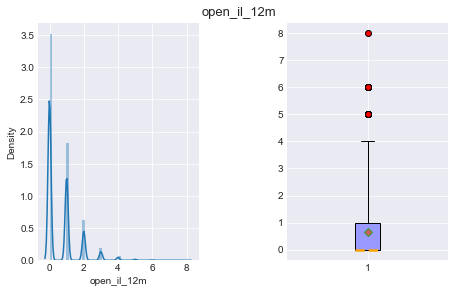

open_il_24m
mean is:  1.49
std is:  1.53
min is:  0.0
max is:  20.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 3.0
99% quantile value is: 7.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


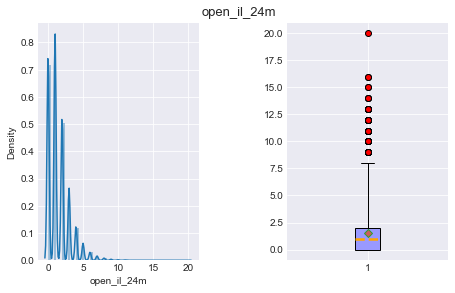

mths_since_rcnt_il
mean is:  21.7
std is:  26.54
min is:  0.0
max is:  507.0
1% quantile value is: 1.0
10% quantile value is: 4.0
90% quantile value is: 45.0
99% quantile value is: 139.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


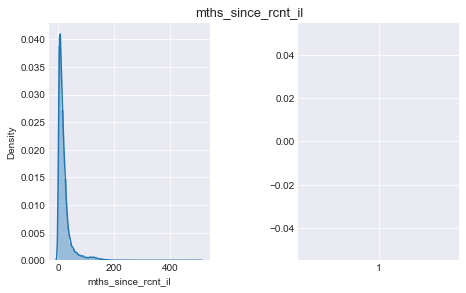

C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


total_bal_il
mean is:  34560.49
std is:  44472.77
min is:  0.0
max is:  995545.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 80357.89999999998
99% quantile value is: 212716.3799999992


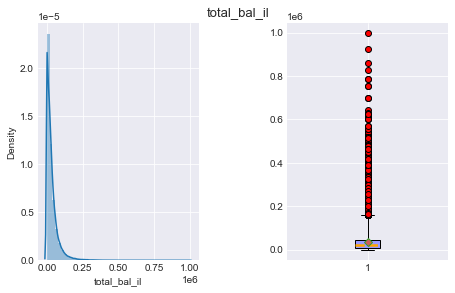

il_util
mean is:  67.61
std is:  24.14
min is:  0.0
max is:  1000.0
1% quantile value is: 6.0
10% quantile value is: 35.0
90% quantile value is: 95.0
99% quantile value is: 119.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


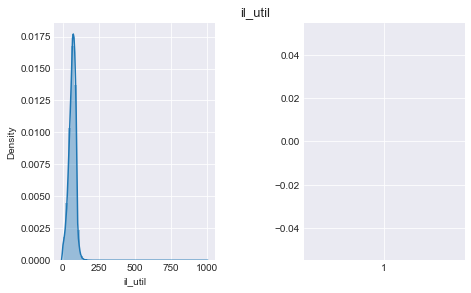

In [46]:
for col in num_variables[13:27]:
    print(col)
    print("mean is: ", round(df[col].mean(),2))
    print("std is: ", round(df[col].std(), 2))
    print("min is: ", df[col].min())
    print("max is: ", df[col].max())
    print("1% quantile value is:", df[col].quantile(.01))
    print("10% quantile value is:", df[col].quantile(.1))
    print("90% quantile value is:", df[col].quantile(.9))
    print("99% quantile value is:", df[col].quantile(.99))
    plt.style.use('seaborn-darkgrid')
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #ax = np.reshape(ax, (1, 2))
    fig.set_size_inches(6, 4)
    fig.subplots_adjust(wspace=.55, left=0.035, right=.985, top=.925, bottom=.1)
    fig.suptitle(col, fontsize=13)
    sns.distplot(df[col], label = "univariate analysis on: " + col, ax=ax1)
    #plt.savefig("figs/univariate_analysis/" + col + ".png")
    #plt.show()
    ax2.boxplot(x = df[col],
                whis = 3,# set extreme ourlier x > Q3+3(Q3-Q1) & X < Q1-3(Q3-Q1)
                patch_artist=True, 
                showmeans=True, # mean: show with point
                boxprops = {'color':'black','facecolor':'#9999ff'}, #set box features
                flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # outlier: show with o
                meanprops = {'marker':'D','markerfacecolor':'indianred'}, 
                medianprops = {'linestyle':'--', 'linewidth':2.5, 'color':'orange'}) # medium: show with line
    ax2.tick_params(top='off', right='off')
    #ax2.set_title("BoxPlot on: " + col)
    plt.show()      

#### The variables in the second group that there are lots of outliers should be explored more.


##### collections_12_mths_ex_med
Definition: Number of collections in 12 months excluding medical collections

Background:

Collections can appear from unsecured accounts, such as credit cards and personal loans. In contrast, secured loans such as mortgages or auto loans that default would involve foreclosure and repossession, respectively. Auto loans can end up in collections also, even if they are repossessed. The amount they are sold for at auction may be less than the full amount owed, and the remaining amount can still be sent to collections.

Virtually any type of unpaid debt can be sent to collection, including:
Credit cards, Student loans, Auto loans, Utilities, Services, Government, Medical

Collections are a continuation of debt owed and can stay on your credit report for up to 7 years from the date the debt first became delinquent and was not brought current. However, if an account were to become late today, the payments were never brought current, it was charged off as bad debt, closed and sent to collection, then the original delinquency date would be today's date.

Late payments, skipped payments, and collection accounts are all a factor in determining your credit scores.

In [47]:
# the maximun of the value is 8, which exceeds the mean a lots
df_num['collections_12_mths_ex_med'].describe()

count    107864.000000
mean          0.016734
std           0.142971
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: collections_12_mths_ex_med, dtype: float64

In [52]:
# Most of the loan borrowers are without any medical collections in past 12 months.

df_num['collections_12_mths_ex_med'].value_counts(dropna=False)

0.0    106216
1.0      1525
2.0       102
3.0        13
4.0         6
5.0         1
8.0         1
Name: collections_12_mths_ex_med, dtype: int64

##### acc_now_delinq

Definition: The number of accounts on which the borrower is now delinquent.

In [54]:
# the amount of loan borrowers with 1 is 26 that is very small portion. how could I handle this variable? delete it?
df_num['acc_now_delinq'].value_counts()

0.0    107838
1.0        26
Name: acc_now_delinq, dtype: int64

##### tot_coll_amt

Definition: Total collection amounts ever owed

In [56]:
df_num['tot_coll_amt'].describe()

count    1.078640e+05
mean     2.932763e+02
std      2.481319e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.214661e+06
Name: tot_coll_amt, dtype: float64

In [55]:
df_num['tot_coll_amt'].value_counts()

0.0        92963
50.0         127
100.0        109
75.0         108
150.0         84
           ...  
9118.0         1
827.0          1
3921.0         1
2791.0         1
36779.0        1
Name: tot_coll_amt, Length: 3774, dtype: int64

#####  tot_cur_bal
Total current balance of all accounts

In [59]:
df_num['tot_cur_bal'].describe()

count    1.078640e+05
mean     1.437632e+05
std      1.676133e+05
min      0.000000e+00
25%      2.649400e+04
50%      7.513550e+04
75%      2.173230e+05
max      5.752177e+06
Name: tot_cur_bal, dtype: float64

<AxesSubplot:xlabel='tot_cur_bal', ylabel='Count'>

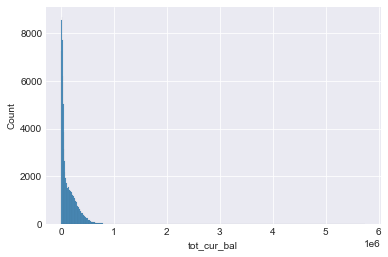

In [60]:
sns.histplot(df_num['tot_cur_bal'])

<AxesSubplot:xlabel='tot_cur_bal', ylabel='Count'>

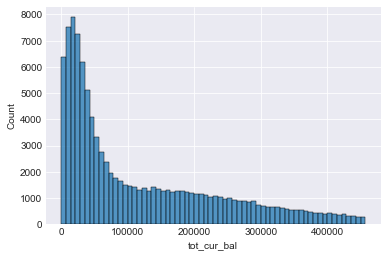

In [62]:
plot the tot_cur_bal histplot before 95 pencentile 
sns.histplot(df_num[df_num['tot_cur_bal']< df_num['tot_cur_bal'].quantile(0.95)]['tot_cur_bal'])

##### open_acc_6m

Definition: Number of open trades in last 6 months

Background: Open trades on your credit report refer to types of accounts you carry. These include loan agreements you’ve entered into and credit accounts extended to you by banks and financial institutions. Creditors and future lenders review your open trades to get an idea of your payment habits, how you use your accounts and how you manage your available credit. When you review your credit report, you might notice you have several different types of open trade accounts.

In [63]:
df_num['open_acc_6m'].value_counts()

0.0     49996
1.0     33005
2.0     15358
3.0      6116
4.0      2180
5.0       757
6.0       254
7.0       113
8.0        57
9.0        21
10.0        4
12.0        3
Name: open_acc_6m, dtype: int64

<AxesSubplot:xlabel='open_acc_6m', ylabel='Count'>

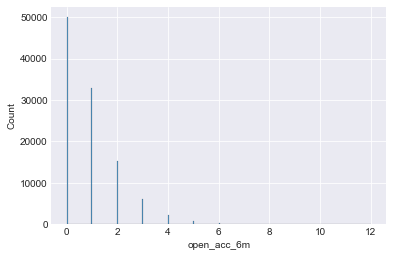

In [64]:
sns.histplot(df_num['open_acc_6m'])

##### open_act_il
Definition: Number of currently active installment trades

An installment account is one with a fixed monthly payment for the life of the loan. Auto loans and student loans are common examples of installment loans. Because too many of your installment accounts were opened recently, the history on those new accounts is not long enough to provide sufficient payment and account history to demonstrate responsible behavior on those accounts. In addition, having multiple accounts that are relatively new is seen as a higher risk because of the possibility of becoming overextended, which can then lead to late payments or defaulting on the account.

In [65]:
df_num['open_act_il'].value_counts()

1.0     28293
2.0     25218
3.0     15515
0.0     14875
4.0      8296
5.0      4485
6.0      2742
7.0      1885
8.0      1430
9.0      1095
10.0      840
11.0      671
12.0      568
13.0      421
14.0      341
15.0      287
16.0      208
17.0      151
18.0      127
19.0      100
20.0       79
21.0       63
22.0       41
23.0       29
25.0       21
24.0       21
27.0       10
26.0        8
31.0        6
28.0        6
33.0        6
32.0        5
30.0        5
29.0        5
36.0        4
37.0        3
35.0        2
41.0        1
38.0        1
Name: open_act_il, dtype: int64

<AxesSubplot:xlabel='open_act_il', ylabel='Count'>

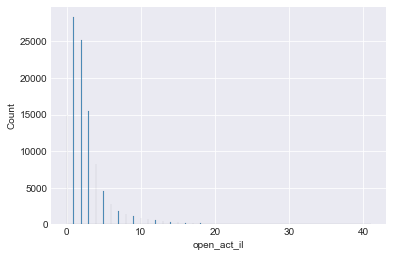

In [66]:
sns.histplot(df_num['open_act_il'])

##### open_il_12m

Definition: Number of installment accounts opened in past 12 months

In [67]:
df_num['open_il_12m'].value_counts()

0.0    60679
1.0    31424
2.0    10938
3.0     3261
4.0     1092
5.0      350
6.0      119
8.0        1
Name: open_il_12m, dtype: int64

<AxesSubplot:xlabel='open_il_12m', ylabel='Count'>

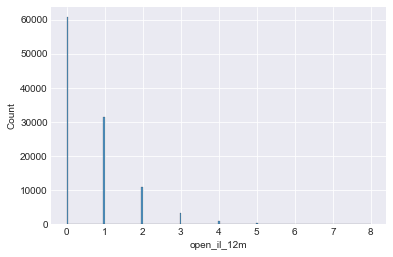

In [68]:
sns.histplot(df_num['open_il_12m'])

### The third group 

open_rv_12m
mean is:  1.22
std is:  1.47
min is:  0.0
max is:  19.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 3.0
99% quantile value is: 6.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


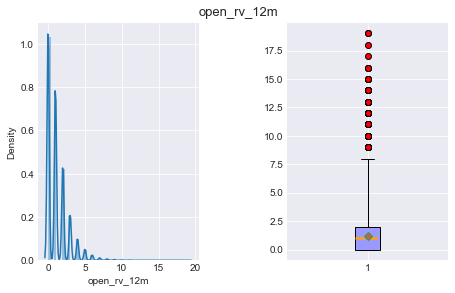

open_rv_24m
mean is:  2.6
std is:  2.53
min is:  0.0
max is:  38.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 6.0
99% quantile value is: 11.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


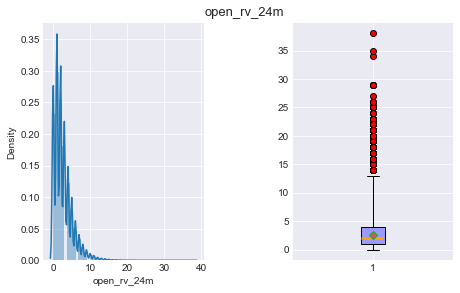

max_bal_bc
mean is:  5833.65
std is:  5589.52
min is:  0.0
max is:  199777.0
1% quantile value is: 0.0
10% quantile value is: 756.0
90% quantile value is: 12588.0
99% quantile value is: 25383.109999999986


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


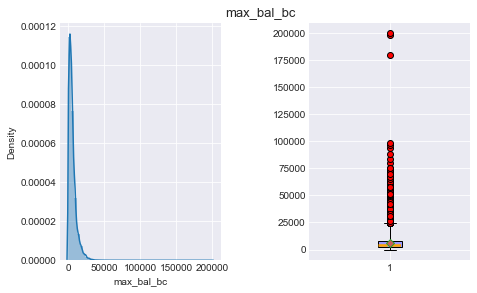

all_util
mean is:  53.55
std is:  21.45
min is:  0.0
max is:  239.0
1% quantile value is: 3.349999999999909
10% quantile value is: 25.0
90% quantile value is: 81.0
99% quantile value is: 100.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


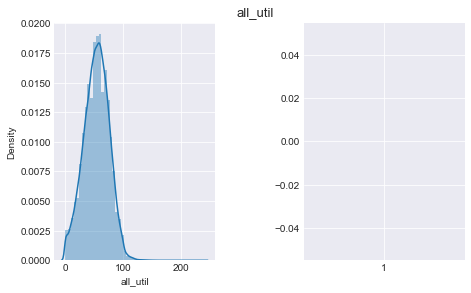

C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


total_rev_hi_lim
mean is:  38353.03
std is:  36714.79
min is:  0.0
max is:  1123500.0
1% quantile value is: 2000.0
10% quantile value is: 8800.0
90% quantile value is: 77500.0
99% quantile value is: 174000.0


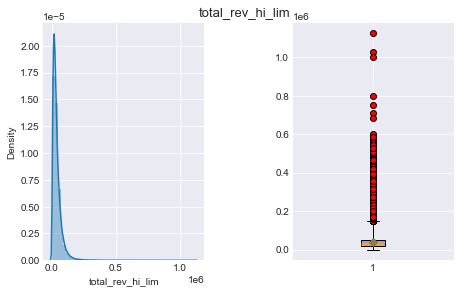

inq_fi
mean is:  1.05
std is:  1.49
min is:  0.0
max is:  38.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 3.0
99% quantile value is: 7.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


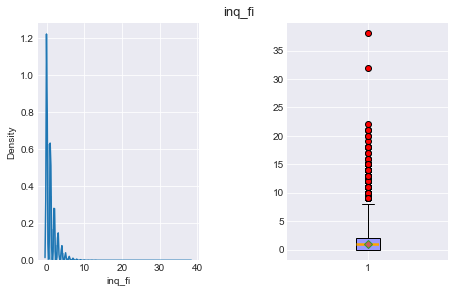

total_cu_tl
mean is:  1.46
std is:  2.63
min is:  0.0
max is:  52.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 4.0
99% quantile value is: 12.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


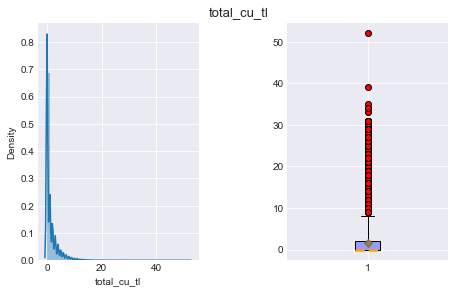

inq_last_12m
mean is:  1.95
std is:  2.37
min is:  0.0
max is:  46.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 5.0
99% quantile value is: 11.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


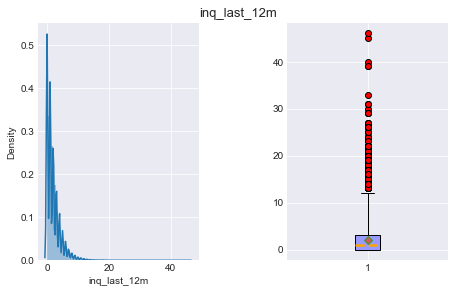

bc_open_to_buy
mean is:  15444.07
std is:  19828.81
min is:  0.0
max is:  469679.0
1% quantile value is: 35.0
10% quantile value is: 799.0
90% quantile value is: 38533.09999999999
99% quantile value is: 93665.23000000001


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


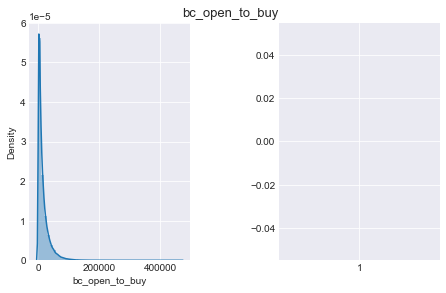

C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


bc_util
mean is:  49.12
std is:  29.18
min is:  0.0
max is:  201.6
1% quantile value is: 0.0
10% quantile value is: 9.5
90% quantile value is: 91.1
99% quantile value is: 99.7


C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


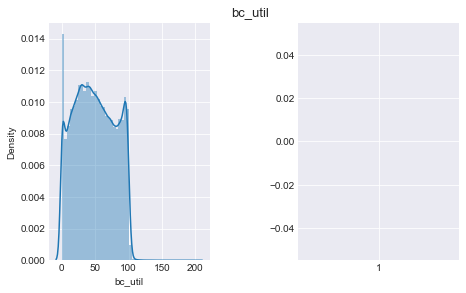

chargeoff_within_12_mths
mean is:  0.01
std is:  0.1
min is:  0.0
max is:  9.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 0.0
99% quantile value is: 0.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


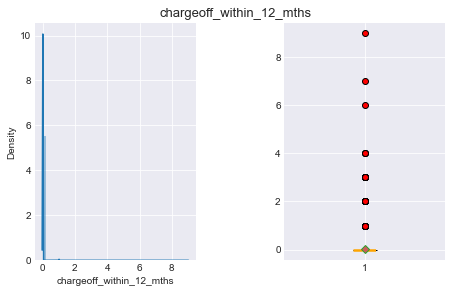

delinq_amnt
mean is:  3.56
std is:  324.83
min is:  0.0
max is:  65000.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 0.0
99% quantile value is: 0.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


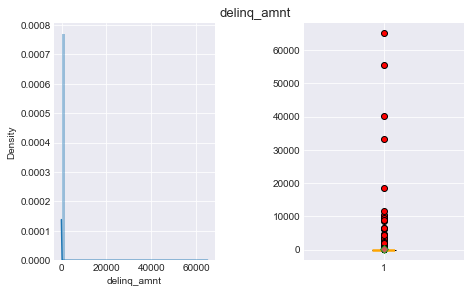

mo_sin_old_il_acct
mean is:  123.22
std is:  55.34
min is:  1.0
max is:  565.0
1% quantile value is: 10.0
10% quantile value is: 44.0
90% quantile value is: 180.0
99% quantile value is: 276.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


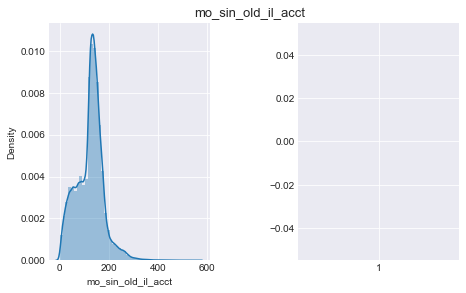

C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mo_sin_old_rev_tl_op
mean is:  179.98
std is:  101.22
min is:  1.0
max is:  817.0
1% quantile value is: 26.0
10% quantile value is: 61.0
90% quantile value is: 320.0
99% quantile value is: 489.0


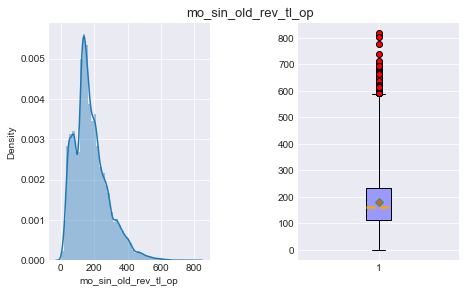

In [69]:
for col in num_variables[27:41]:
    print(col)
    print("mean is: ", round(df[col].mean(),2))
    print("std is: ", round(df[col].std(), 2))
    print("min is: ", df[col].min())
    print("max is: ", df[col].max())
    print("1% quantile value is:", df[col].quantile(.01))
    print("10% quantile value is:", df[col].quantile(.1))
    print("90% quantile value is:", df[col].quantile(.9))
    print("99% quantile value is:", df[col].quantile(.99))
    plt.style.use('seaborn-darkgrid')
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #ax = np.reshape(ax, (1, 2))
    fig.set_size_inches(6, 4)
    fig.subplots_adjust(wspace=.55, left=0.035, right=.985, top=.925, bottom=.1)
    fig.suptitle(col, fontsize=13)
    sns.distplot(df[col], label = "univariate analysis on: " + col, ax=ax1)
    #plt.savefig("figs/univariate_analysis/" + col + ".png")
    #plt.show()
    ax2.boxplot(x = df[col],
                whis = 3,# set extreme ourlier x > Q3+3(Q3-Q1) & X < Q1-3(Q3-Q1)
                patch_artist=True, 
                showmeans=True, # mean: show with point
                boxprops = {'color':'black','facecolor':'#9999ff'}, #set box features
                flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # outlier: show with o
                meanprops = {'marker':'D','markerfacecolor':'indianred'}, 
                medianprops = {'linestyle':'--', 'linewidth':2.5, 'color':'orange'}) # medium: show with line
    ax2.tick_params(top='off', right='off')
    #ax2.set_title("BoxPlot on: " + col)
    plt.show()

##### chargeoff_within_12_mths
Definition:Number of charge-offs within 12 months. A charge-off is a debt, for example on a credit card, that is deemed unlikely to be collected by the creditor because the borrower has become substantially delinquent after a period of time. 

- A charge-off refers to debt that a company believes it will no longer collect as the borrower has become delinquent on payments.
- Charged-off debt does not mean that the consumer does not have to repay the debt anymore.
- After a lender has charged off a debt, it could sell the debt to a third-party collections agency that would attempt to collect on the delinquent account.
- A consumer owes the debt until it is paid off, settled, discharged in a bankruptcy proceeding, or in case of legal proceedings, becomes too old due to the statute of limitations.

In [70]:
df_num['chargeoff_within_12_mths'].value_counts()

0.0    107194
1.0       618
2.0        37
3.0         9
4.0         3
7.0         1
6.0         1
9.0         1
Name: chargeoff_within_12_mths, dtype: int64

##### delinq_amnt

Definition: The past-due amount owed for the accounts on which the borrower is now delinquent.

In [71]:

df_num['delinq_amnt'].describe()

count    107864.000000
mean          3.559640
std         324.829448
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       65000.000000
Name: delinq_amnt, dtype: float64

In [73]:
# most of the loan borrowers are without any delinq_amnt
df_num['delinq_amnt'].value_counts()

0.0        107786
1236.0          2
753.0           2
2214.0          1
930.0           1
            ...  
1443.0          1
11564.0         1
2382.0          1
2384.0          1
1909.0          1
Name: delinq_amnt, Length: 77, dtype: int64

<AxesSubplot:xlabel='delinq_amnt', ylabel='Count'>

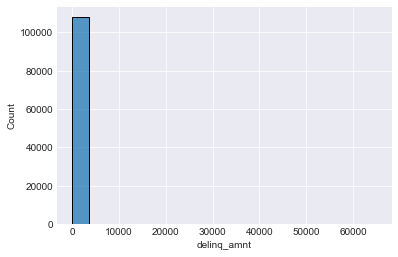

In [72]:
sns.histplot(df_num['delinq_amnt'])

### The fourth group 

mo_sin_rcnt_rev_tl_op
mean is:  15.14
std is:  18.97
min is:  0.0
max is:  502.0
1% quantile value is: 0.0
10% quantile value is: 2.0
90% quantile value is: 34.0
99% quantile value is: 98.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


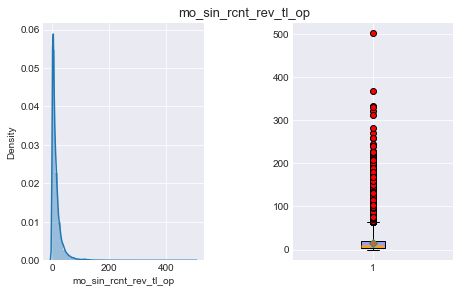

mo_sin_rcnt_tl
mean is:  8.76
std is:  9.77
min is:  0.0
max is:  368.0
1% quantile value is: 0.0
10% quantile value is: 2.0
90% quantile value is: 19.0
99% quantile value is: 44.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


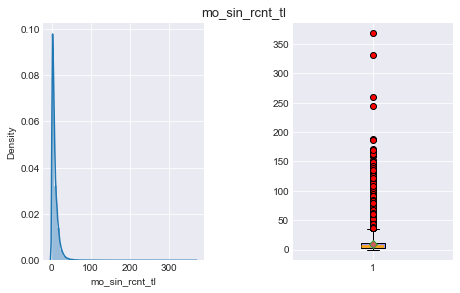

mort_acc
mean is:  1.39
std is:  1.75
min is:  0.0
max is:  46.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 4.0
99% quantile value is: 7.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


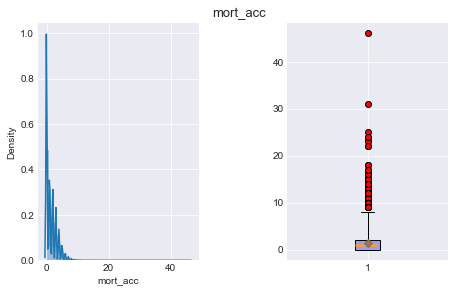

mths_since_recent_bc
mean is:  25.53
std is:  34.09
min is:  0.0
max is:  534.0
1% quantile value is: 1.0
10% quantile value is: 3.0
90% quantile value is: 59.0
99% quantile value is: 167.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


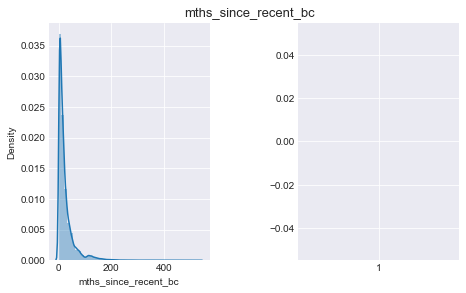

mths_since_recent_bc_dlq
mean is:  40.45
std is:  22.26
min is:  0.0
max is:  194.0
1% quantile value is: 3.0
10% quantile value is: 12.0
90% quantile value is: 72.0
99% quantile value is: 97.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


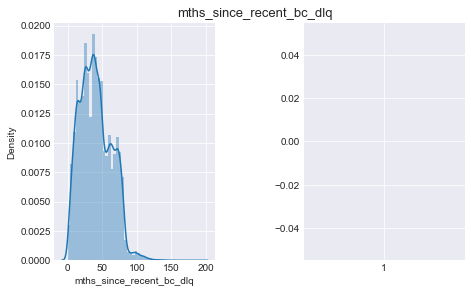

mths_since_recent_inq
mean is:  7.39
std is:  6.01
min is:  0.0
max is:  24.0
1% quantile value is: 0.0
10% quantile value is: 1.0
90% quantile value is: 17.0
99% quantile value is: 23.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


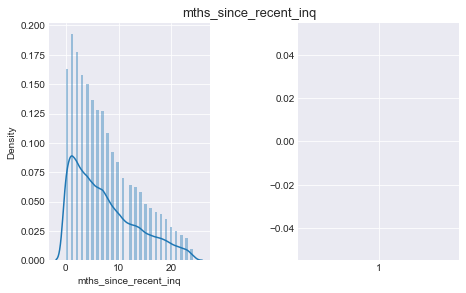

C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


num_accts_ever_120_pd
mean is:  0.45
std is:  1.34
min is:  0.0
max is:  37.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 1.0
99% quantile value is: 6.0


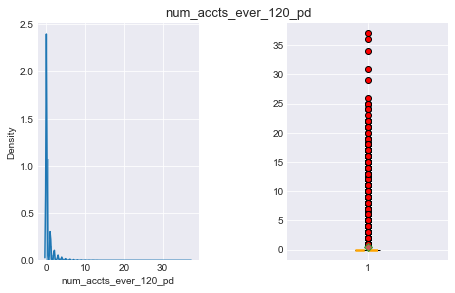

num_actv_bc_tl
mean is:  3.56
std is:  2.41
min is:  0.0
max is:  32.0
1% quantile value is: 0.0
10% quantile value is: 1.0
90% quantile value is: 7.0
99% quantile value is: 12.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


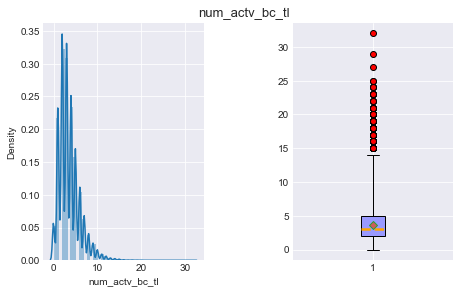

num_il_tl
mean is:  8.05
std is:  7.26
min is:  0.0
max is:  109.0
1% quantile value is: 0.0
10% quantile value is: 1.0
90% quantile value is: 17.0
99% quantile value is: 35.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


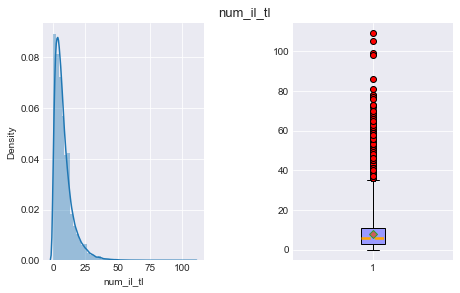

num_tl_90g_dpd_24m
mean is:  0.06
std is:  0.4
min is:  0.0
max is:  19.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 0.0
99% quantile value is: 1.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


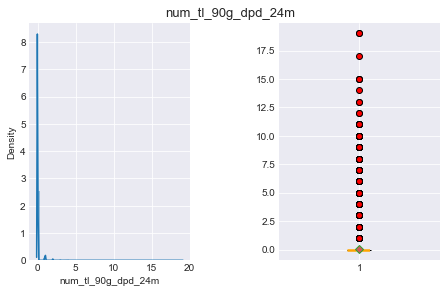

pct_tl_nvr_dlq
mean is:  94.66
std is:  9.04
min is:  0.0
max is:  100.0
1% quantile value is: 60.0
10% quantile value is: 83.3
90% quantile value is: 100.0
99% quantile value is: 100.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


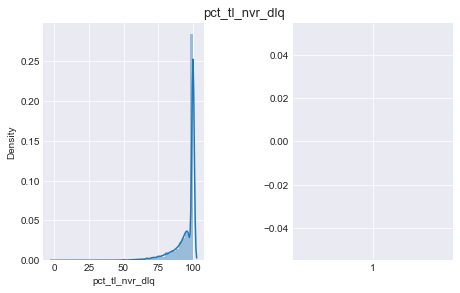

C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


pub_rec_bankruptcies
mean is:  0.12
std is:  0.34
min is:  0.0
max is:  4.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 1.0
99% quantile value is: 1.0


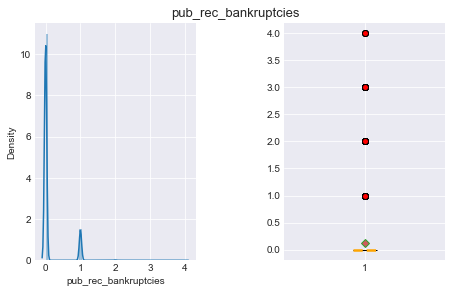

tax_liens
mean is:  0.04
std is:  0.35
min is:  0.0
max is:  52.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 0.0
99% quantile value is: 1.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


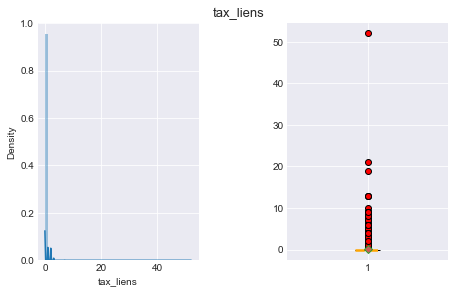

In [76]:
for col in num_variables[41:54]:
    print(col)
    print("mean is: ", round(df[col].mean(),2))
    print("std is: ", round(df[col].std(), 2))
    print("min is: ", df[col].min())
    print("max is: ", df[col].max())
    print("1% quantile value is:", df[col].quantile(.01))
    print("10% quantile value is:", df[col].quantile(.1))
    print("90% quantile value is:", df[col].quantile(.9))
    print("99% quantile value is:", df[col].quantile(.99))
    plt.style.use('seaborn-darkgrid')
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #ax = np.reshape(ax, (1, 2))
    fig.set_size_inches(6, 4)
    fig.subplots_adjust(wspace=.55, left=0.035, right=.985, top=.925, bottom=.1)
    fig.suptitle(col, fontsize=13)
    sns.distplot(df[col], label = "univariate analysis on: " + col, ax=ax1)
    #plt.savefig("figs/univariate_analysis/" + col + ".png")
    #plt.show()
    ax2.boxplot(x = df[col],
                whis = 3,# set extreme ourlier x > Q3+3(Q3-Q1) & X < Q1-3(Q3-Q1)
                patch_artist=True, 
                showmeans=True, # mean: show with point
                boxprops = {'color':'black','facecolor':'#9999ff'}, #set box features
                flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # outlier: show with o
                meanprops = {'marker':'D','markerfacecolor':'indianred'}, 
                medianprops = {'linestyle':'--', 'linewidth':2.5, 'color':'orange'}) # medium: show with line
    ax2.tick_params(top='off', right='off')
    #ax2.set_title("BoxPlot on: " + col)
    plt.show()

##### mo_sin_rcnt_rev_tl_op
Definition: Months since most recent revolving account opened

What Is a Revolving Account?
A revolving account is a type of credit account that provides a borrower with a maximum limit and allows for varying credit availability. Revolving accounts do not have a specified maturity date and can remain open as long as a borrower remains in good standing with the creditor.

KEY TAKEAWAYS for Revolving Account:
- A revolving account provides a credit limit to borrow against.
- These types of accounts provide more flexibility with an open line of credit up to a credit cap.
- Revolving lines are usually credit cards or home equity lines while non-revolving are often car loans or mortgages.

In [81]:
# the maximum value is 502 that is a extreme outlier comparing to mean of 15
df_num['mo_sin_rcnt_rev_tl_op'].describe()

count    107864.000000
mean         15.143449
std          18.972499
min           0.000000
25%           4.000000
50%           9.000000
75%          19.000000
max         502.000000
Name: mo_sin_rcnt_rev_tl_op, dtype: float64

In [77]:
df_num['mo_sin_rcnt_rev_tl_op'].value_counts()

2.0      8053
3.0      7927
4.0      7229
5.0      6201
1.0      5890
         ... 
214.0       1
224.0       1
203.0       1
313.0       1
213.0       1
Name: mo_sin_rcnt_rev_tl_op, Length: 219, dtype: int64

<AxesSubplot:xlabel='mo_sin_rcnt_rev_tl_op', ylabel='Count'>

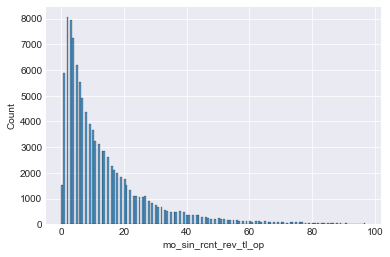

In [83]:
# Avoid the extreme outlier effect, plot histgram before 99 percentile. 
sns.histplot(df_num[df_num['mo_sin_rcnt_rev_tl_op']<df_num['mo_sin_rcnt_rev_tl_op'].quantile(0.99)]['mo_sin_rcnt_rev_tl_op'])

##### mo_sin_rcnt_tl

Definition: Months since most recent account opened

In [85]:
df_num['mo_sin_rcnt_tl'].describe()

count    107864.000000
mean          8.762553
std           9.766118
min           0.000000
25%           3.000000
50%           6.000000
75%          11.000000
max         368.000000
Name: mo_sin_rcnt_tl, dtype: float64

In [86]:
df_num['mo_sin_rcnt_tl'].value_counts(normalize=True)

2.0      0.103760
3.0      0.102694
4.0      0.093711
5.0      0.079990
1.0      0.072730
           ...   
166.0    0.000009
187.0    0.000009
331.0    0.000009
123.0    0.000009
142.0    0.000009
Name: mo_sin_rcnt_tl, Length: 159, dtype: float64

<AxesSubplot:xlabel='mo_sin_rcnt_tl', ylabel='Count'>

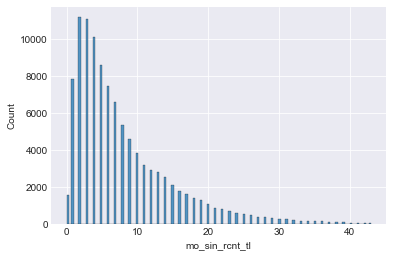

In [88]:
# plot the histgram of variable 'mo_sin_rcnt_tl' before 99 pencentile and it is right skew 
sns.histplot(df_num[df_num['mo_sin_rcnt_tl'] < df_num['mo_sin_rcnt_tl'].quantile(0.99)]['mo_sin_rcnt_tl'])

##### mort_acc

Definition: Number of mortgage accounts.

In [90]:
# There are some extreme outliers
df_num['mort_acc'].describe()

count    107864.000000
mean          1.392967
std           1.751895
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          46.000000
Name: mort_acc, dtype: float64

<AxesSubplot:xlabel='mort_acc', ylabel='Count'>

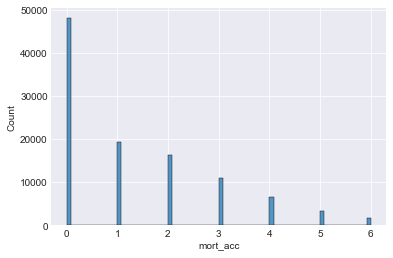

In [93]:
sns.histplot(df_num[df_num['mort_acc']<df_num['mort_acc'].quantile(0.99)]['mort_acc'])

##### mths_since_recent_bc
Definition: Months since most recent bankcard account opened.

In [95]:
df_num['mths_since_recent_bc'].value_counts()

2.0      4946
4.0      4936
3.0      4889
5.0      4517
6.0      4256
         ... 
300.0       1
292.0       1
502.0       1
368.0       1
371.0       1
Name: mths_since_recent_bc, Length: 370, dtype: int64

<AxesSubplot:xlabel='mths_since_recent_bc', ylabel='Count'>

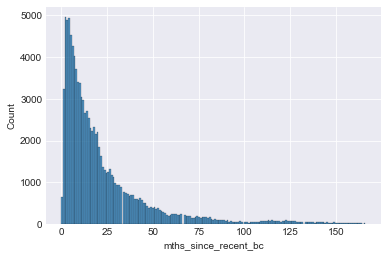

In [96]:
# the histgram is pretty right skew 
sns.histplot(df_num[df_num['mths_since_recent_bc']<df_num['mths_since_recent_bc'].quantile(0.99)]['mths_since_recent_bc'])

### The fourth group

mo_sin_rcnt_tl
mean is:  8.76
std is:  9.77
min is:  0.0
max is:  368.0
1% quantile value is: 0.0
10% quantile value is: 2.0
90% quantile value is: 19.0
99% quantile value is: 44.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


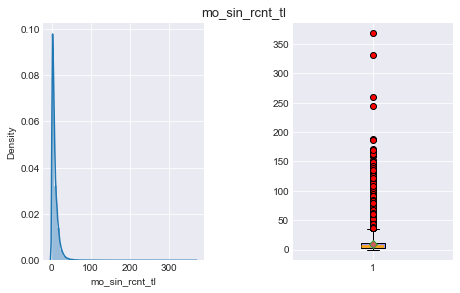

mort_acc
mean is:  1.39
std is:  1.75
min is:  0.0
max is:  46.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 4.0
99% quantile value is: 7.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


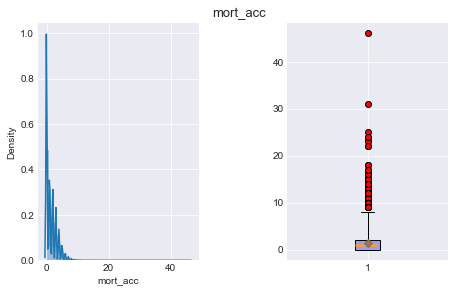

mths_since_recent_bc
mean is:  25.53
std is:  34.09
min is:  0.0
max is:  534.0
1% quantile value is: 1.0
10% quantile value is: 3.0
90% quantile value is: 59.0
99% quantile value is: 167.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


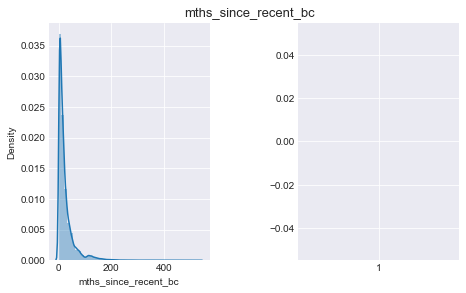

mths_since_recent_bc_dlq
mean is:  40.45
std is:  22.26
min is:  0.0
max is:  194.0
1% quantile value is: 3.0
10% quantile value is: 12.0
90% quantile value is: 72.0
99% quantile value is: 97.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


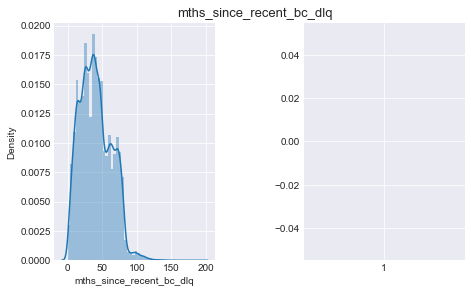

mths_since_recent_inq
mean is:  7.39
std is:  6.01
min is:  0.0
max is:  24.0
1% quantile value is: 0.0
10% quantile value is: 1.0
90% quantile value is: 17.0
99% quantile value is: 23.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


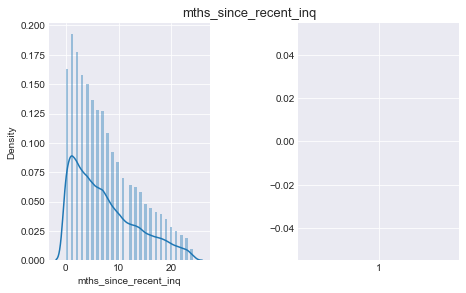

C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


num_accts_ever_120_pd
mean is:  0.45
std is:  1.34
min is:  0.0
max is:  37.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 1.0
99% quantile value is: 6.0


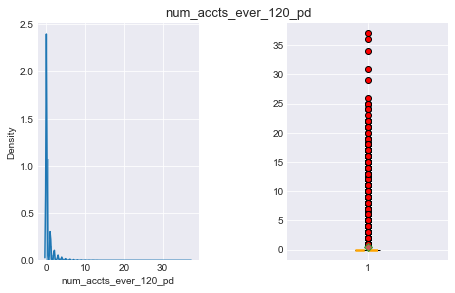

num_actv_bc_tl
mean is:  3.56
std is:  2.41
min is:  0.0
max is:  32.0
1% quantile value is: 0.0
10% quantile value is: 1.0
90% quantile value is: 7.0
99% quantile value is: 12.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


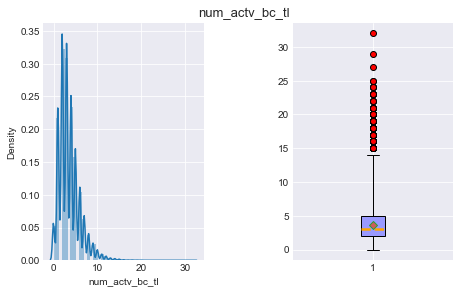

num_il_tl
mean is:  8.05
std is:  7.26
min is:  0.0
max is:  109.0
1% quantile value is: 0.0
10% quantile value is: 1.0
90% quantile value is: 17.0
99% quantile value is: 35.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


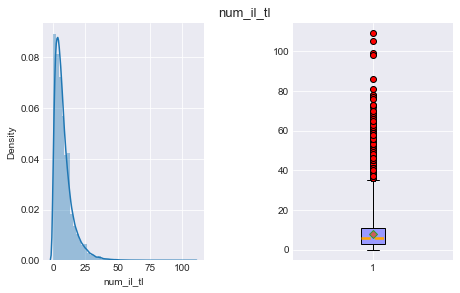

num_tl_90g_dpd_24m
mean is:  0.06
std is:  0.4
min is:  0.0
max is:  19.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 0.0
99% quantile value is: 1.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


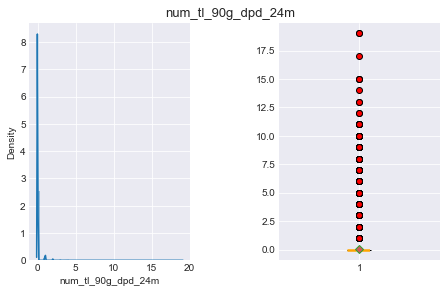

pct_tl_nvr_dlq
mean is:  94.66
std is:  9.04
min is:  0.0
max is:  100.0
1% quantile value is: 60.0
10% quantile value is: 83.3
90% quantile value is: 100.0
99% quantile value is: 100.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


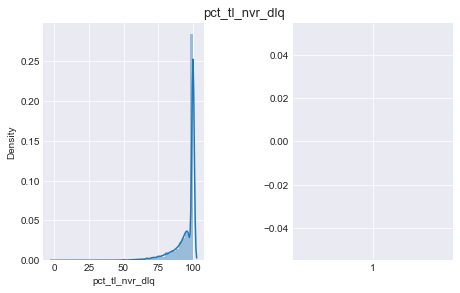

C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


pub_rec_bankruptcies
mean is:  0.12
std is:  0.34
min is:  0.0
max is:  4.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 1.0
99% quantile value is: 1.0


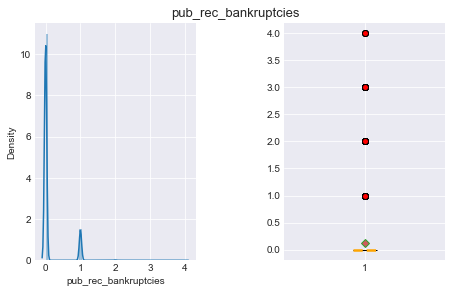

tax_liens
mean is:  0.04
std is:  0.35
min is:  0.0
max is:  52.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 0.0
99% quantile value is: 1.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


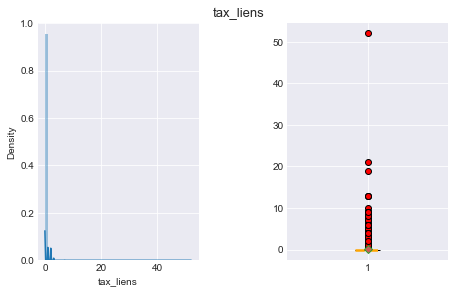

revol_bal_joint
mean is:  34531.57
std is:  28087.75
min is:  0.0
max is:  371153.0
1% quantile value is: 1748.6
10% quantile value is: 8527.0
90% quantile value is: 67995.0
99% quantile value is: 134006.4000000002


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


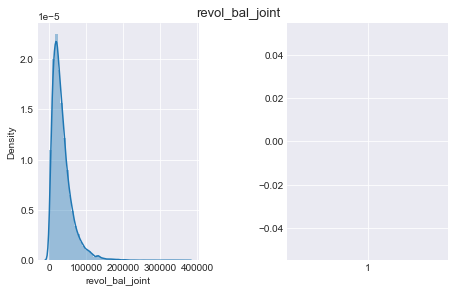

In [98]:
for col in num_variables[42:55]:
    print(col)
    print("mean is: ", round(df[col].mean(),2))
    print("std is: ", round(df[col].std(), 2))
    print("min is: ", df[col].min())
    print("max is: ", df[col].max())
    print("1% quantile value is:", df[col].quantile(.01))
    print("10% quantile value is:", df[col].quantile(.1))
    print("90% quantile value is:", df[col].quantile(.9))
    print("99% quantile value is:", df[col].quantile(.99))
    plt.style.use('seaborn-darkgrid')
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #ax = np.reshape(ax, (1, 2))
    fig.set_size_inches(6, 4)
    fig.subplots_adjust(wspace=.55, left=0.035, right=.985, top=.925, bottom=.1)
    fig.suptitle(col, fontsize=13)
    sns.distplot(df[col], label = "univariate analysis on: " + col, ax=ax1)
    #plt.savefig("figs/univariate_analysis/" + col + ".png")
    #plt.show()
    ax2.boxplot(x = df[col],
                whis = 3,# set extreme ourlier x > Q3+3(Q3-Q1) & X < Q1-3(Q3-Q1)
                patch_artist=True, 
                showmeans=True, # mean: show with point
                boxprops = {'color':'black','facecolor':'#9999ff'}, #set box features
                flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # outlier: show with o
                meanprops = {'marker':'D','markerfacecolor':'indianred'}, 
                medianprops = {'linestyle':'--', 'linewidth':2.5, 'color':'orange'}) # medium: show with line
    ax2.tick_params(top='off', right='off')
    #ax2.set_title("BoxPlot on: " + col)
    plt.show()

##### num_accts_ever_120_pd

Definition: Number of accounts ever 120 or more days past due

In [99]:
df_num['num_accts_ever_120_pd'].value_counts()

0.0     85758
1.0     12230
2.0      4412
3.0      2007
4.0      1237
5.0       734
6.0       478
7.0       287
8.0       203
9.0       133
10.0      104
11.0       65
12.0       53
13.0       38
14.0       37
15.0       18
16.0       16
17.0       12
18.0       11
22.0        6
21.0        5
19.0        5
24.0        3
25.0        3
20.0        2
34.0        1
29.0        1
36.0        1
26.0        1
37.0        1
31.0        1
23.0        1
Name: num_accts_ever_120_pd, dtype: int64

<AxesSubplot:xlabel='num_accts_ever_120_pd', ylabel='Count'>

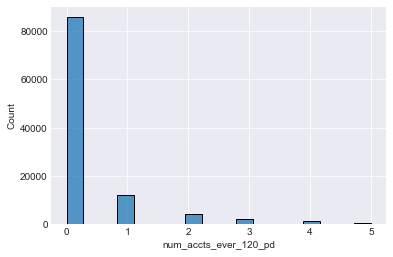

In [100]:
# Most of the loans only zero or one time ever 120 or more days past due
sns.histplot(df_num[df_num['num_accts_ever_120_pd']< df_num['num_accts_ever_120_pd'].quantile(0.99)]['num_accts_ever_120_pd'])

##### num_tl_90g_dpd_24m
Definition: Number of accounts 90 or more days past due in last 24 months

In [101]:
df_num['num_tl_90g_dpd_24m'].value_counts()

0.0     103623
1.0       3336
2.0        522
3.0        147
4.0         87
5.0         40
6.0         30
7.0         20
8.0         17
9.0         13
10.0        12
11.0         6
15.0         3
12.0         2
19.0         2
13.0         2
17.0         1
14.0         1
Name: num_tl_90g_dpd_24m, dtype: int64

In [ ]:
##### pct_tl_nvr_dlq
Percent of trades never delinquent

In [103]:
df_num['pct_tl_nvr_dlq'].value_counts()

100.0    60650
90.0      1217
91.7      1186
90.9      1172
87.5      1154
         ...  
86.6         1
84.5         1
37.0         1
41.0         1
11.8         1
Name: pct_tl_nvr_dlq, Length: 473, dtype: int64

<AxesSubplot:xlabel='pct_tl_nvr_dlq', ylabel='Count'>

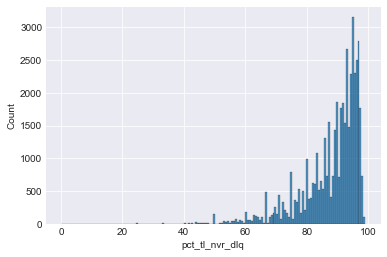

In [104]:
sns.histplot(df_num[df_num['pct_tl_nvr_dlq']<df_num['pct_tl_nvr_dlq'].quantile(0.99)]['pct_tl_nvr_dlq'])

##### tax_liens: Number of tax liens

A tax lien is a legal claim against the assets of an individual or business that fails to pay taxes owed to the government. In general, a lien serves to guarantee payment of a debt such as a loan or, in this case, taxes. If the obligation is not satisfied, the creditor may proceed to seize the assets.
- If a taxpayer does not respond to a demand for payment, the government may place a lien on the person's assets.
- The lien may be removed if the taxpayer agrees to a payment plan or takes other action with the agreement of the government.
- If no attempt to repay is made, the government may seize the assets for sale.


In [106]:
# most of the loan borrowers do not fail to pay taxes owed to the government and has question mark for the 
# people with the number of taxes owed greater than 5?
df['tax_liens'].value_counts(normalize=True)

0.0     0.975775
1.0     0.016465
2.0     0.004496
3.0     0.001734
4.0     0.000788
5.0     0.000334
6.0     0.000176
7.0     0.000074
9.0     0.000056
8.0     0.000037
13.0    0.000028
52.0    0.000009
19.0    0.000009
21.0    0.000009
10.0    0.000009
Name: tax_liens, dtype: float64

### The fifth group

sec_app_inq_last_6mths
mean is:  0.65
std is:  1.02
min is:  0.0
max is:  6.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 2.0
99% quantile value is: 4.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


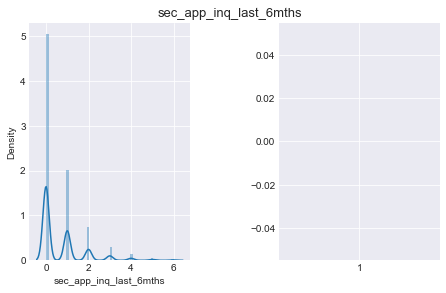

sec_app_mort_acc
mean is:  1.55
std is:  1.79
min is:  0.0
max is:  27.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 4.0
99% quantile value is: 7.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


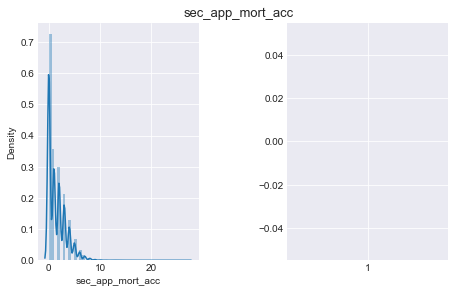

sec_app_open_acc
mean is:  11.62
std is:  6.67
min is:  0.0
max is:  66.0
1% quantile value is: 1.0
10% quantile value is: 4.0
90% quantile value is: 20.0
99% quantile value is: 32.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


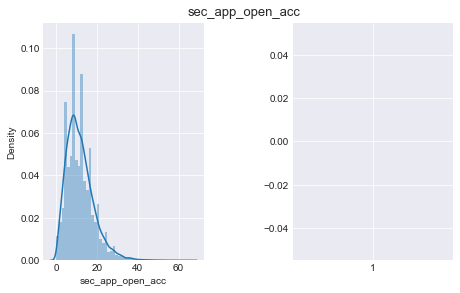

sec_app_revol_util
mean is:  58.68
std is:  25.93
min is:  0.0
max is:  434.3
1% quantile value is: 0.1
10% quantile value is: 22.4
90% quantile value is: 91.5
99% quantile value is: 101.6


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


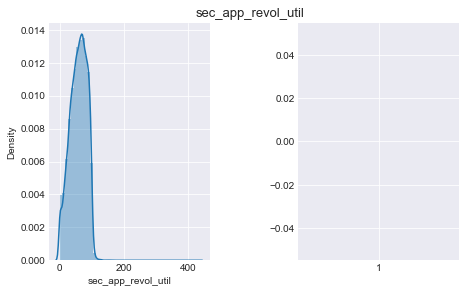

sec_app_open_act_il
mean is:  3.01
std is:  3.25
min is:  0.0
max is:  34.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 6.0
99% quantile value is: 16.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


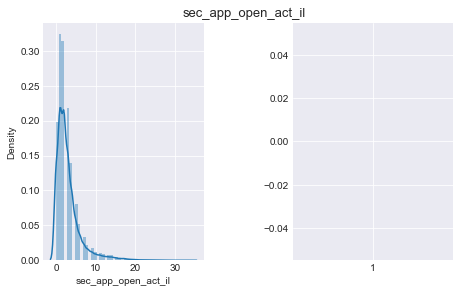

sec_app_num_rev_accts
mean is:  12.77
std is:  8.29
min is:  0.0
max is:  85.0
1% quantile value is: 1.0
10% quantile value is: 4.0
90% quantile value is: 24.0
99% quantile value is: 39.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


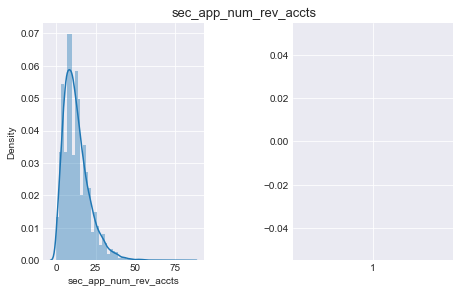

sec_app_chargeoff_within_12_mths
mean is:  0.06
std is:  0.46
min is:  0.0
max is:  17.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 0.0
99% quantile value is: 1.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


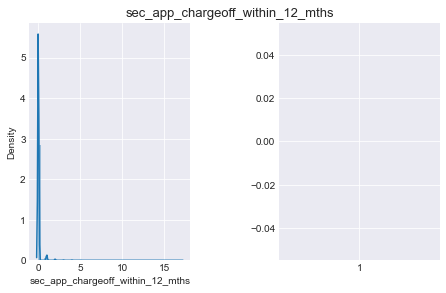

C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


sec_app_collections_12_mths_ex_med
mean is:  0.08
std is:  0.44
min is:  0.0
max is:  15.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 0.0
99% quantile value is: 2.0


C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


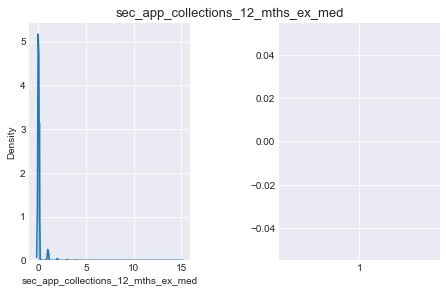

sec_app_mths_since_last_major_derog
mean is:  35.5
std is:  23.92
min is:  0.0
max is:  131.0
1% quantile value is: 0.0
10% quantile value is: 4.0
90% quantile value is: 70.0
99% quantile value is: 81.73999999999978


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


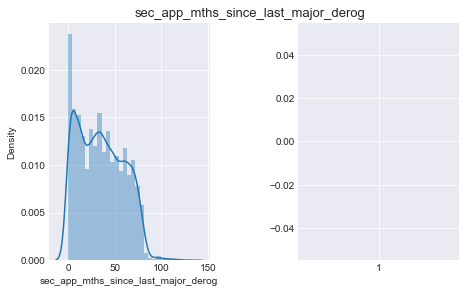

In [107]:
for col in num_variables[56:]:
    print(col)
    print("mean is: ", round(df[col].mean(),2))
    print("std is: ", round(df[col].std(), 2))
    print("min is: ", df[col].min())
    print("max is: ", df[col].max())
    print("1% quantile value is:", df[col].quantile(.01))
    print("10% quantile value is:", df[col].quantile(.1))
    print("90% quantile value is:", df[col].quantile(.9))
    print("99% quantile value is:", df[col].quantile(.99))
    plt.style.use('seaborn-darkgrid')
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #ax = np.reshape(ax, (1, 2))
    fig.set_size_inches(6, 4)
    fig.subplots_adjust(wspace=.55, left=0.035, right=.985, top=.925, bottom=.1)
    fig.suptitle(col, fontsize=13)
    sns.distplot(df[col], label = "univariate analysis on: " + col, ax=ax1)
    #plt.savefig("figs/univariate_analysis/" + col + ".png")
    #plt.show()
    ax2.boxplot(x = df[col],
                whis = 3,# set extreme ourlier x > Q3+3(Q3-Q1) & X < Q1-3(Q3-Q1)
                patch_artist=True, 
                showmeans=True, # mean: show with point
                boxprops = {'color':'black','facecolor':'#9999ff'}, #set box features
                flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # outlier: show with o
                meanprops = {'marker':'D','markerfacecolor':'indianred'}, 
                medianprops = {'linestyle':'--', 'linewidth':2.5, 'color':'orange'}) # medium: show with line
    ax2.tick_params(top='off', right='off')
    #ax2.set_title("BoxPlot on: " + col)
    plt.show()

## Categorical Variable

In [115]:
# There are 20 categorical variables and it will be convenient to seperate them into two groups to explore. 
cat_variables = list(df.select_dtypes(include=['object']).columns)
len(cat_variables)

20

In [116]:
cat_variables

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_credit_pull_d',
 'application_type',
 'verification_status_joint',
 'sec_app_earliest_cr_line']

In [118]:
# becuase of 37288 different title names, it is not easly to plot and explore this varilable, so it has been temporarily dropped. 
df['emp_title'].value_counts()

Teacher                     1921
Manager                     1898
Owner                       1827
Driver                      1035
Registered Nurse             771
                            ... 
Worker 4                       1
Technical Design Manager       1
Hca                            1
Security specialist            1
Student Consultant             1
Name: emp_title, Length: 37288, dtype: int64

In [119]:
# At current stage,I decide to drop zip_code 
df['zip_code']

0         207xx
1         108xx
2         797xx
3         467xx
4         200xx
          ...  
107859    919xx
107860    601xx
107861    038xx
107862    463xx
107863    900xx
Name: zip_code, Length: 107864, dtype: object

In [124]:
# last_credit_pull_d:The most recent month LC pulled credit for this loan. 
# It would be dropped because of not providing too much meaning
df['last_credit_pull_d']

0         Mar-2020
1         Oct-2020
2         Oct-2020
3         Oct-2020
4         Aug-2020
            ...   
107859    Oct-2020
107860    Oct-2020
107861    Oct-2020
107862    Oct-2020
107863    Aug-2020
Name: last_credit_pull_d, Length: 107864, dtype: object

##### revol_util: 

Definition: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

Revolving utilization, also known as “credit utilization” or your “debt-to-limit ratio,” relates only to revolving credit and isn’t a factor with installment loans. Utilization refers to how much of your credit balance you’re using at a given time.


##### What Is Revolving Utilization’s Impact on Your Credit Score?
Your revolving utilization rate does impact your credit. It’s the second-largest factor in the calculation of your credit score. Your utilization rate accounts for around 30% of your score. The only factor more important is whether you make your payments on time.

Why is credit utilization so important to your score? Because to lenders, it can say a lot about you as a borrower.

If you’re currently maxed out on all your existing credit, you may be struggling to pay your debts. Or you might not be managing your debts in the most responsible fashion. Either way, lenders might see you as a riskier investment and be less inclined to approve you for loans or other credit.

In [129]:
# This variable should be continous variable, but the pandas consider it as string because of %, so % should be removed. 
df['revol_util']

0         24.5%
1         23.7%
2           36%
3         65.3%
4         63.5%
          ...  
107859    90.3%
107860    49.2%
107861    51.9%
107862    43.6%
107863     4.1%
Name: revol_util, Length: 107864, dtype: object

In [132]:
df['revol_util'] = df['revol_util'].str.replace('%','')
df['revol_util'] = df['revol_util'].astype(float)
df['revol_util']

0         24.5
1         23.7
2         36.0
3         65.3
4         63.5
          ... 
107859    90.3
107860    49.2
107861    51.9
107862    43.6
107863     4.1
Name: revol_util, Length: 107864, dtype: float64

In [141]:
df['revol_util'].describe()

count    107715.000000
mean         43.372762
std          25.149181
min           0.000000
25%          23.500000
50%          41.500000
75%          61.800000
max         191.000000
Name: revol_util, dtype: float64

<AxesSubplot:xlabel='revol_util', ylabel='Count'>

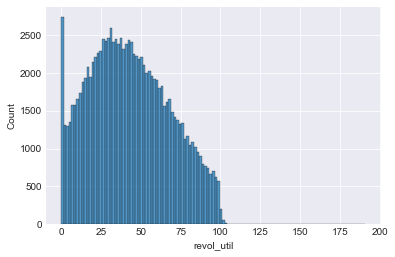

In [138]:
sns.histplot(df['revol_util'])

##### int_rate: Interest Rate on the loan
Generally speaking, interest rate should be a continous variable, so it should be converted to float type 

In [152]:
df['int_rate'] = df['int_rate'].str.replace('%', '')
df['int_rate']= df['int_rate'].astype('float')
df['int_rate']

0         13.58
1          5.31
2         11.98
3          9.92
4         20.39
          ...  
107859    12.62
107860    14.08
107861    10.91
107862    10.42
107863    13.59
Name: int_rate, Length: 107864, dtype: float64

In [154]:
df['int_rate'].describe()

count    107864.000000
mean         12.423171
std           5.004180
min           5.310000
25%           9.430000
50%          11.980000
75%          15.050000
max          30.990000
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

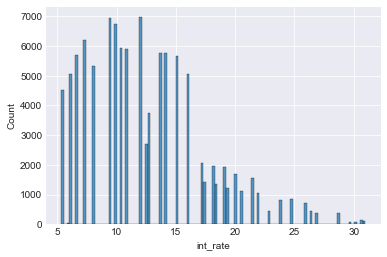

In [153]:
sns.histplot(df['int_rate'])

In [147]:
# sec_app_earliest_cr_line: Earliest credit line at time of application for the secondary applicant
# it could be dropped for no providing too many meaningful information 
df['sec_app_earliest_cr_line']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
107859    NaN
107860    NaN
107861    NaN
107862    NaN
107863    NaN
Name: sec_app_earliest_cr_line, Length: 107864, dtype: object

In [ ]:
cat_variables.remove('zip_code')
cat_variables.remove('emp_title')
cat_variables.remove('last_credit_pull_d')
cat_variables.remove('revol_util')
cat_variables.remove('sec_app_earliest_cr_line')

In [149]:
# After dropping two variables, there are still 18 variables. 
len(cat_variables)

15

term


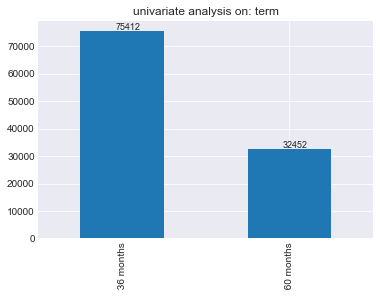


int_rate


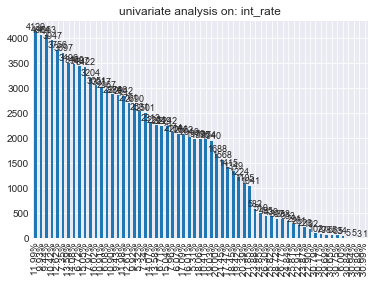


grade


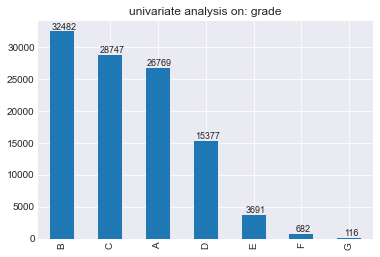


sub_grade


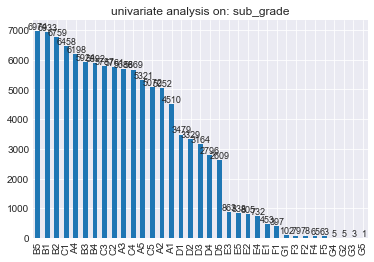


emp_length


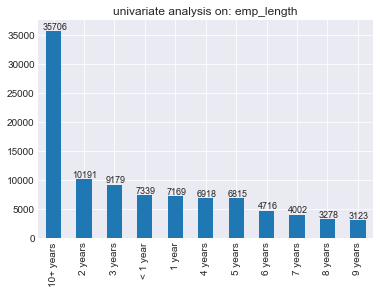


home_ownership


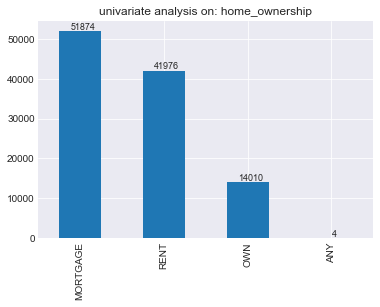


verification_status


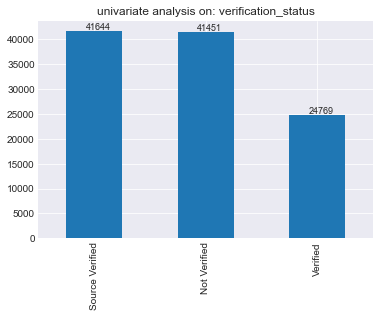


loan_status


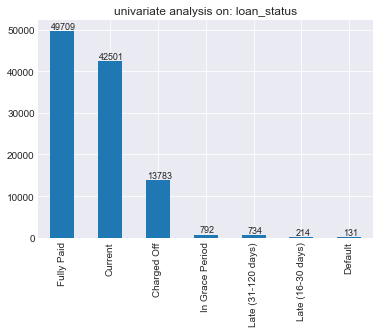


purpose


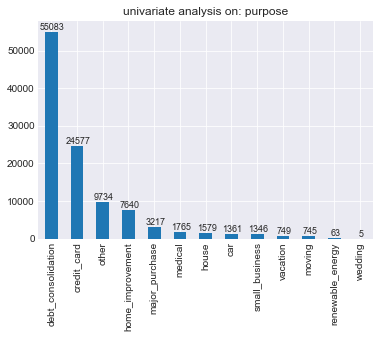


title


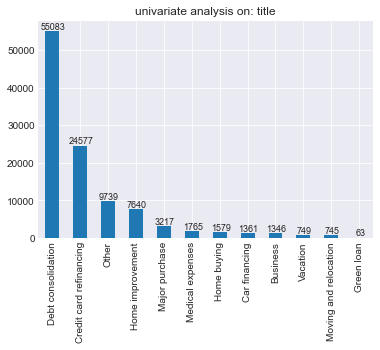


addr_state


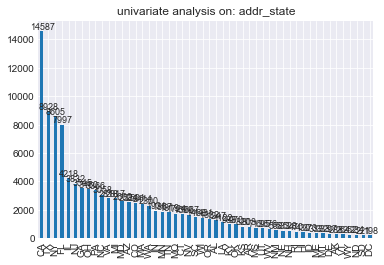


earliest_cr_line


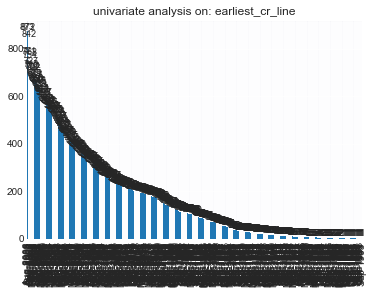


initial_list_status


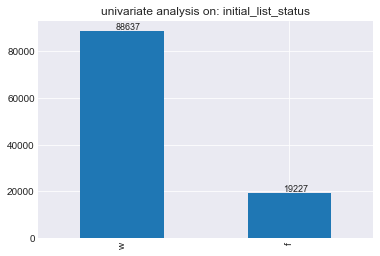


application_type


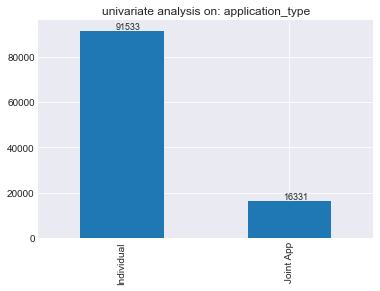


verification_status_joint


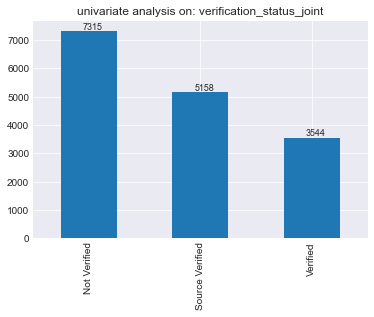

In [150]:
for col in cat_variables:
    print(col)
    df[col].value_counts().plot(kind = "bar", title = "univariate analysis on: " + col)
    
    for i,v in enumerate(list(df[col].value_counts())):
        plt.text(i+0.035, v, '%d' % v, ha='center', va= 'bottom',fontsize=9)

    #plt.savefig("figs/univariate_analysis/" + col + ".png")
    plt.show() 
    print()